In [1]:

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
water=pd.read_csv("Cities1.csv")

In [3]:
water.keys()

Index(['City', 'Region', 'Country', 'AirQuality', 'WaterPollution'], dtype='object')

In [4]:
life=pd.read_csv("Life Expectancy Data.csv")

In [5]:
life.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
life=life.groupby(["Country"]).agg({"Life expectancy ":"mean", "Hepatitis B":"mean", "Adult Mortality":"mean"})

In [7]:
life

,Life expectancy,Hepatitis B,Adult Mortality
Country,,,
Afghanistan,58.19375,64.562500,269.0625
Albania,75.15625,98.000000,45.0625
Algeria,73.61875,78.000000,108.1875
Angola,49.01875,70.222222,328.5625
Antigua and Barbuda,75.05625,98.266667,127.5000
...,...,...,...
Venezuela (Bolivarian Republic of),73.38750,66.250000,163.0000
Viet Nam,74.77500,87.538462,126.5625
Yemen,63.86250,55.687500,211.8125


In [8]:
water=water.groupby(["Country"]).agg({"WaterPollution":"mean", "AirQuality":"mean"})

In [9]:
water

,WaterPollution,AirQuality
Country,,
Afghanistan,53.440657,37.213694
Albania,57.834201,51.873625
Algeria,50.623043,57.607466
Andorra,25.000000,43.750000
Angola,81.250000,15.000000
...,...,...
Venezuela,78.549637,36.514509
Vietnam,65.526918,44.557443
Yemen,85.416667,39.583333


In [10]:
popu=pd.read_csv("world_population.csv")
popu.keys()
popu.rename(columns= {"Country/Territory": "Country"}, inplace=True)
popu=popu.groupby(["Country"]).agg({"2022 Population":"sum"})
wife=pd.merge(water,life,on="Country")
wife=pd.merge(wife,popu,on="Country")
wife.rename(columns= {"2022 Population": "Population"}, inplace=True)
wife

,WaterPollution,AirQuality,Life expectancy,Hepatitis B,Adult Mortality,Population
Country,,,,,,
Afghanistan,53.440657,37.213694,58.19375,64.562500,269.0625,41128771
Albania,57.834201,51.873625,75.15625,98.000000,45.0625,2842321
Algeria,50.623043,57.607466,73.61875,78.000000,108.1875,44903225
Angola,81.250000,15.000000,49.01875,70.222222,328.5625,35588987
Argentina,54.276152,68.147781,75.15625,81.285714,106.0000,45510318
...,...,...,...,...,...,...
Uzbekistan,49.166667,56.451613,68.03125,95.642857,184.8125,34627652
Vanuatu,70.000000,75.000000,71.38750,56.125000,137.8750,326740
Yemen,85.416667,39.583333,63.86250,55.687500,211.8125,33696614


In [11]:
wife

,WaterPollution,AirQuality,Life expectancy,Hepatitis B,Adult Mortality,Population
Country,,,,,,
Afghanistan,53.440657,37.213694,58.19375,64.562500,269.0625,41128771
Albania,57.834201,51.873625,75.15625,98.000000,45.0625,2842321
Algeria,50.623043,57.607466,73.61875,78.000000,108.1875,44903225
Angola,81.250000,15.000000,49.01875,70.222222,328.5625,35588987
Argentina,54.276152,68.147781,75.15625,81.285714,106.0000,45510318
...,...,...,...,...,...,...
Uzbekistan,49.166667,56.451613,68.03125,95.642857,184.8125,34627652
Vanuatu,70.000000,75.000000,71.38750,56.125000,137.8750,326740
Yemen,85.416667,39.583333,63.86250,55.687500,211.8125,33696614


In [12]:
wife.isna().sum()

WaterPollution      0
AirQuality          0
Life expectancy     4
Hepatitis B         7
Adult Mortality     4
Population          0
dtype: int64

In [13]:
wife.dropna(inplace=True)


In [14]:
wife

,WaterPollution,AirQuality,Life expectancy,Hepatitis B,Adult Mortality,Population
Country,,,,,,
Afghanistan,53.440657,37.213694,58.19375,64.562500,269.0625,41128771
Albania,57.834201,51.873625,75.15625,98.000000,45.0625,2842321
Algeria,50.623043,57.607466,73.61875,78.000000,108.1875,44903225
Angola,81.250000,15.000000,49.01875,70.222222,328.5625,35588987
Argentina,54.276152,68.147781,75.15625,81.285714,106.0000,45510318
...,...,...,...,...,...,...
Uzbekistan,49.166667,56.451613,68.03125,95.642857,184.8125,34627652
Vanuatu,70.000000,75.000000,71.38750,56.125000,137.8750,326740
Yemen,85.416667,39.583333,63.86250,55.687500,211.8125,33696614


In [15]:
wife.isna().sum()

WaterPollution      0
AirQuality          0
Life expectancy     0
Hepatitis B         0
Adult Mortality     0
Population          0
dtype: int64

In [16]:
wife.drop_duplicates()
wife

,WaterPollution,AirQuality,Life expectancy,Hepatitis B,Adult Mortality,Population
Country,,,,,,
Afghanistan,53.440657,37.213694,58.19375,64.562500,269.0625,41128771
Albania,57.834201,51.873625,75.15625,98.000000,45.0625,2842321
Algeria,50.623043,57.607466,73.61875,78.000000,108.1875,44903225
Angola,81.250000,15.000000,49.01875,70.222222,328.5625,35588987
Argentina,54.276152,68.147781,75.15625,81.285714,106.0000,45510318
...,...,...,...,...,...,...
Uzbekistan,49.166667,56.451613,68.03125,95.642857,184.8125,34627652
Vanuatu,70.000000,75.000000,71.38750,56.125000,137.8750,326740
Yemen,85.416667,39.583333,63.86250,55.687500,211.8125,33696614


In [17]:
wife.columns=[col.replace(" ","_").lower() for col in wife.columns]
wife

,waterpollution,airquality,life_expectancy_,hepatitis_b,adult_mortality,population
Country,,,,,,
Afghanistan,53.440657,37.213694,58.19375,64.562500,269.0625,41128771
Albania,57.834201,51.873625,75.15625,98.000000,45.0625,2842321
Algeria,50.623043,57.607466,73.61875,78.000000,108.1875,44903225
Angola,81.250000,15.000000,49.01875,70.222222,328.5625,35588987
Argentina,54.276152,68.147781,75.15625,81.285714,106.0000,45510318
...,...,...,...,...,...,...
Uzbekistan,49.166667,56.451613,68.03125,95.642857,184.8125,34627652
Vanuatu,70.000000,75.000000,71.38750,56.125000,137.8750,326740
Yemen,85.416667,39.583333,63.86250,55.687500,211.8125,33696614


<Axes: xlabel='life_expectancy_', ylabel='Count'>

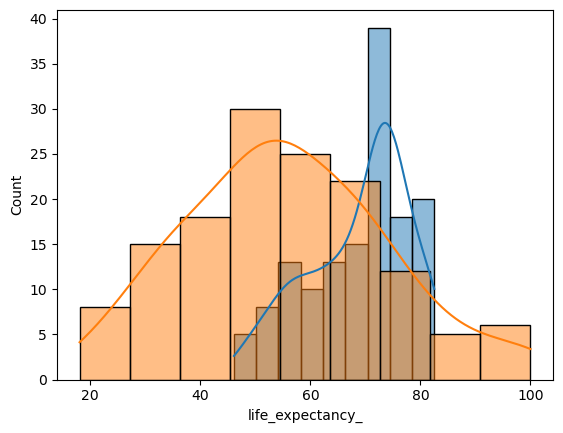

In [18]:
import seaborn as sns
sns.histplot(wife['life_expectancy_'], kde=True)
sns.histplot(wife['waterpollution'], kde=True)

In [19]:
wife.rename(columns= {"waterpollution": "water_pollution", "airquality":"air_quality", "life_expectancy_":"life_expectancy"}, inplace=True)

In [20]:
wife

,water_pollution,air_quality,life_expectancy,hepatitis_b,adult_mortality,population
Country,,,,,,
Afghanistan,53.440657,37.213694,58.19375,64.562500,269.0625,41128771
Albania,57.834201,51.873625,75.15625,98.000000,45.0625,2842321
Algeria,50.623043,57.607466,73.61875,78.000000,108.1875,44903225
Angola,81.250000,15.000000,49.01875,70.222222,328.5625,35588987
Argentina,54.276152,68.147781,75.15625,81.285714,106.0000,45510318
...,...,...,...,...,...,...
Uzbekistan,49.166667,56.451613,68.03125,95.642857,184.8125,34627652
Vanuatu,70.000000,75.000000,71.38750,56.125000,137.8750,326740
Yemen,85.416667,39.583333,63.86250,55.687500,211.8125,33696614


In [21]:
wife=wife.apply(lambda x:round(x,2))

In [22]:
wife

,water_pollution,air_quality,life_expectancy,hepatitis_b,adult_mortality,population
Country,,,,,,
Afghanistan,53.44,37.21,58.19,64.56,269.06,41128771
Albania,57.83,51.87,75.16,98.00,45.06,2842321
Algeria,50.62,57.61,73.62,78.00,108.19,44903225
Angola,81.25,15.00,49.02,70.22,328.56,35588987
Argentina,54.28,68.15,75.16,81.29,106.00,45510318
...,...,...,...,...,...,...
Uzbekistan,49.17,56.45,68.03,95.64,184.81,34627652
Vanuatu,70.00,75.00,71.39,56.12,137.88,326740
Yemen,85.42,39.58,63.86,55.69,211.81,33696614


In [23]:
wife.to_csv("wife.csv")

In [24]:
wife

,water_pollution,air_quality,life_expectancy,hepatitis_b,adult_mortality,population
Country,,,,,,
Afghanistan,53.44,37.21,58.19,64.56,269.06,41128771
Albania,57.83,51.87,75.16,98.00,45.06,2842321
Algeria,50.62,57.61,73.62,78.00,108.19,44903225
Angola,81.25,15.00,49.02,70.22,328.56,35588987
Argentina,54.28,68.15,75.16,81.29,106.00,45510318
...,...,...,...,...,...,...
Uzbekistan,49.17,56.45,68.03,95.64,184.81,34627652
Vanuatu,70.00,75.00,71.39,56.12,137.88,326740
Yemen,85.42,39.58,63.86,55.69,211.81,33696614


In [25]:
wife

,water_pollution,air_quality,life_expectancy,hepatitis_b,adult_mortality,population
Country,,,,,,
Afghanistan,53.44,37.21,58.19,64.56,269.06,41128771
Albania,57.83,51.87,75.16,98.00,45.06,2842321
Algeria,50.62,57.61,73.62,78.00,108.19,44903225
Angola,81.25,15.00,49.02,70.22,328.56,35588987
Argentina,54.28,68.15,75.16,81.29,106.00,45510318
...,...,...,...,...,...,...
Uzbekistan,49.17,56.45,68.03,95.64,184.81,34627652
Vanuatu,70.00,75.00,71.39,56.12,137.88,326740
Yemen,85.42,39.58,63.86,55.69,211.81,33696614


In [26]:
#splitting into 3 subsets for machine learning purposes

dflife=wife.drop(columns=["hepatitis_b","adult_mortality"])
dfmort=wife.drop(columns=["hepatitis_b","life_expectancy"])
dfhep=wife.drop(columns=["life_expectancy","adult_mortality"])

In [27]:
dflife

,water_pollution,air_quality,life_expectancy,population
Country,,,,
Afghanistan,53.44,37.21,58.19,41128771
Albania,57.83,51.87,75.16,2842321
Algeria,50.62,57.61,73.62,44903225
Angola,81.25,15.00,49.02,35588987
Argentina,54.28,68.15,75.16,45510318
...,...,...,...,...
Uzbekistan,49.17,56.45,68.03,34627652
Vanuatu,70.00,75.00,71.39,326740
Yemen,85.42,39.58,63.86,33696614


In [28]:
from sklearn.model_selection import train_test_split

features=dflife.drop(columns=["life_expectancy"])
target=dflife["life_expectancy"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [29]:
standardizer=StandardScaler()

standardizer.fit(x_train)


StandardScaler()

In [30]:
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
pd.DataFrame(x_train_st, columns=x_train.columns)


,water_pollution,air_quality,population
0,0.128302,-0.606805,0.952844
1,-0.666445,0.692768,-0.255893
2,-1.177507,0.996168,0.180543
3,0.484919,-0.233354,0.549680
4,-0.471244,-0.512191,-0.023968
...,...,...,...
107,0.307951,-0.810588,-0.277174
108,-1.134069,-1.109895,-0.268311
109,-1.908974,1.548385,-0.274431
110,0.000670,0.105072,0.146242


In [31]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train_st,y_train)


KNeighborsRegressor(n_neighbors=10)

In [32]:
knn.score(x_test_st,y_test)

-0.08069267115184164

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error
pred=knn.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))


8.365274750728299

In [34]:
knn.predict(x_test_st)

array([71.035, 71.455, 77.152, 60.038, 70.013, 70.105, 67.922, 58.926,
       72.293, 68.068, 69.578, 70.999, 67.809, 72.117, 71.339, 78.146,
       69.386, 68.704, 67.779, 74.052, 67.56 , 67.56 , 68.695, 77.21 ,
       69.358, 75.547, 75.76 , 73.66 , 71.834])

In [35]:
y_test

Country
Georgia       73.51
Italy         82.19
Austria       81.48
Guinea        56.01
Kyrgyzstan    69.08
Chile         79.45
Libya         72.49
Honduras      72.99
Sweden        82.52
Azerbaijan    70.73
Malaysia      73.76
Bhutan        66.16
Thailand      73.08
Suriname      70.08
Tajikistan    66.66
Paraguay      73.11
Rwanda        59.31
Mongolia      65.89
Djibouti      60.76
Indonesia     67.56
Nicaragua     73.45
Cambodia      64.34
Vanuatu       71.39
Canada        81.69
Algeria       73.62
Seychelles    72.38
Chad          50.39
Sudan         61.82
Botswana      56.05
Name: life_expectancy, dtype: float64

<Axes: xlabel='life_expectancy', ylabel='Count'>

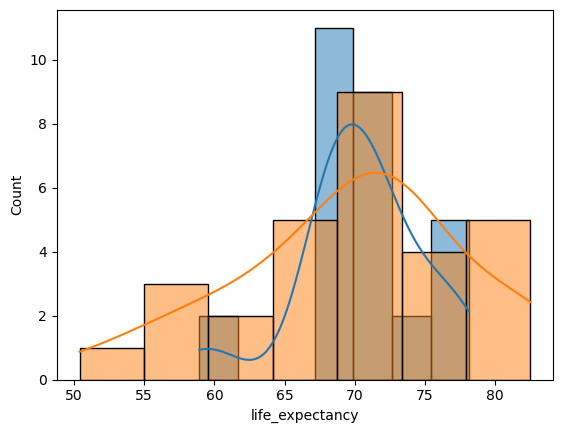

In [36]:
sns.histplot(knn.predict(x_test_st), kde=True)
sns.histplot(y_test, kde=True)

In [37]:
features=dfmort.drop(columns=["adult_mortality"])
target=dfmort["adult_mortality"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [38]:
standardizer=StandardScaler()

standardizer.fit(x_train)

StandardScaler()

In [39]:
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
pd.DataFrame(x_train_st, columns=x_train.columns)

,water_pollution,air_quality,population
0,0.128302,-0.606805,0.952844
1,-0.666445,0.692768,-0.255893
2,-1.177507,0.996168,0.180543
3,0.484919,-0.233354,0.549680
4,-0.471244,-0.512191,-0.023968
...,...,...,...
107,0.307951,-0.810588,-0.277174
108,-1.134069,-1.109895,-0.268311
109,-1.908974,1.548385,-0.274431
110,0.000670,0.105072,0.146242


In [40]:

knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train_st,y_train)

KNeighborsRegressor(n_neighbors=10)

In [41]:
knn.score(x_test_st,y_test)

-0.11396983887639323

In [42]:
pred=knn.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))

86.05010343599145

In [43]:
knn.predict(x_test_st)

array([153.995, 152.138,  98.881, 231.955, 139.531, 137.938, 185.906,
       280.725, 157.825, 154.382, 166.75 , 152.675, 193.793, 136.507,
       132.895,  88.605, 170.588, 129.901, 204.751, 138.568, 179.262,
       179.262, 175.337, 108.088, 182.726, 109.505, 110.412, 135.462,
       147.126])

In [44]:
y_test

Country
Georgia       114.94
Italy          54.19
Austria        65.75
Guinea        259.88
Kyrgyzstan    173.69
Chile          63.62
Libya         139.69
Honduras      142.00
Sweden         59.19
Azerbaijan    115.19
Malaysia      118.56
Bhutan        230.25
Thailand      160.38
Suriname      166.00
Tajikistan    177.56
Paraguay      139.94
Rwanda        246.81
Mongolia      222.12
Djibouti      274.69
Indonesia     166.56
Nicaragua     162.38
Cambodia      196.38
Vanuatu       137.88
Canada         64.62
Algeria       108.19
Seychelles    161.19
Chad          227.75
Sudan         240.31
Botswana      448.12
Name: adult_mortality, dtype: float64

<Axes: xlabel='adult_mortality', ylabel='Count'>

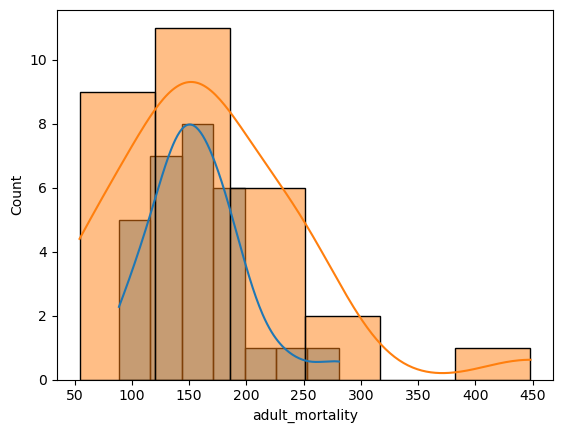

In [45]:
sns.histplot(knn.predict(x_test_st), kde=True)
sns.histplot(y_test, kde=True)

In [46]:
#what if I got rid of the population?
corr=np.abs(dflife.corr())
mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True


In [47]:

mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True

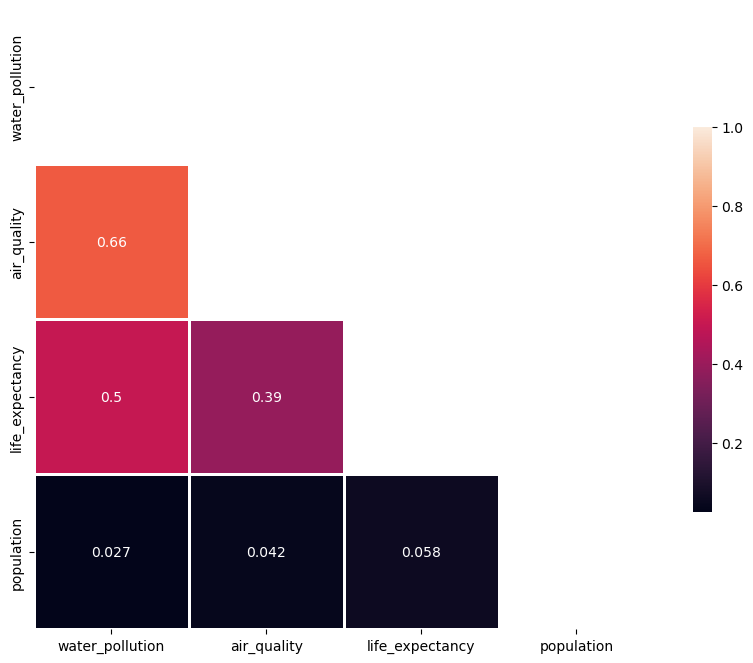

In [48]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.8, cbar_kws={"shrink": .5},annot = corr)
plt.show()


In [49]:
knn.score(x_test_st,y_test)

-0.11396983887639323

In [50]:
pred=knn.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))

86.05010343599145

In [51]:
dfmort

,water_pollution,air_quality,adult_mortality,population
Country,,,,
Afghanistan,53.44,37.21,269.06,41128771
Albania,57.83,51.87,45.06,2842321
Algeria,50.62,57.61,108.19,44903225
Angola,81.25,15.00,328.56,35588987
Argentina,54.28,68.15,106.00,45510318
...,...,...,...,...
Uzbekistan,49.17,56.45,184.81,34627652
Vanuatu,70.00,75.00,137.88,326740
Yemen,85.42,39.58,211.81,33696614


In [52]:
features=dfhep.drop(columns=["hepatitis_b"])
target=dfhep["hepatitis_b"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [53]:
standardizer=StandardScaler()

standardizer.fit(x_train)

StandardScaler()

In [54]:
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
pd.DataFrame(x_train_st, columns=x_train.columns)

,water_pollution,air_quality,population
0,0.128302,-0.606805,0.952844
1,-0.666445,0.692768,-0.255893
2,-1.177507,0.996168,0.180543
3,0.484919,-0.233354,0.549680
4,-0.471244,-0.512191,-0.023968
...,...,...,...
107,0.307951,-0.810588,-0.277174
108,-1.134069,-1.109895,-0.268311
109,-1.908974,1.548385,-0.274431
110,0.000670,0.105072,0.146242


In [55]:
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train_st,y_train)

KNeighborsRegressor(n_neighbors=10)

In [56]:
knn.score(x_test_st,y_test)

-0.07050776157907412

In [57]:
pred=knn.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))

19.00023750214536

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [59]:
features=dflife.drop(columns=["life_expectancy"])
target=dflife["life_expectancy"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [60]:

standardizer=StandardScaler()
standardizer.fit(x_train)
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
pd.DataFrame(x_train_st, columns=x_train.columns)


,water_pollution,air_quality,population
0,0.128302,-0.606805,0.952844
1,-0.666445,0.692768,-0.255893
2,-1.177507,0.996168,0.180543
3,0.484919,-0.233354,0.549680
4,-0.471244,-0.512191,-0.023968
...,...,...,...
107,0.307951,-0.810588,-0.277174
108,-1.134069,-1.109895,-0.268311
109,-1.908974,1.548385,-0.274431
110,0.000670,0.105072,0.146242


In [61]:
x_train_st=pd.DataFrame(x_train_st, columns=x_train.columns)
x_test_st=pd.DataFrame(x_test_st, columns=x_test.columns)


In [62]:
LR = LinearRegression()
LR.fit(x_train_st,y_train)
pred=LR.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))


8.133805838891814

In [63]:
LR.score(x_test_st, y_test)

-0.02171410624219905

In [64]:
LR.coef_
{feature:coef for feature,coef in zip(features.columns,LR.coef_)}

{'water_pollution': -4.632779182462854,
 'air_quality': 0.7396364269653369,
 'population': -0.35187957305812617}

In [65]:
features=dfmort.drop(columns=["adult_mortality"])
target=dfmort["adult_mortality"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [66]:
standardizer=StandardScaler()
standardizer.fit(x_train)
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
pd.DataFrame(x_train_st, columns=x_train.columns)

,water_pollution,air_quality,population
0,0.128302,-0.606805,0.952844
1,-0.666445,0.692768,-0.255893
2,-1.177507,0.996168,0.180543
3,0.484919,-0.233354,0.549680
4,-0.471244,-0.512191,-0.023968
...,...,...,...
107,0.307951,-0.810588,-0.277174
108,-1.134069,-1.109895,-0.268311
109,-1.908974,1.548385,-0.274431
110,0.000670,0.105072,0.146242


In [67]:
x_train_st=pd.DataFrame(x_train_st, columns=x_train.columns)
x_test_st=pd.DataFrame(x_test_st, columns=x_test.columns)

In [68]:
LR = LinearRegression()
LR.fit(x_train_st,y_train)
pred=LR.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))

81.65437543067644

In [69]:
LR.score(x_test_st, y_test)

-0.003066119313047677

In [70]:
LR.coef_
{feature:coef for feature,coef in zip(features.columns,LR.coef_)}

{'water_pollution': 49.70351901217391,
 'air_quality': 13.270807278589427,
 'population': -1.593318433223584}

In [71]:
features=dfhep.drop(columns=["hepatitis_b"])
target=dfhep["hepatitis_b"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [72]:
standardizer=StandardScaler()
standardizer.fit(x_train)
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
pd.DataFrame(x_train_st, columns=x_train.columns)

,water_pollution,air_quality,population
0,0.128302,-0.606805,0.952844
1,-0.666445,0.692768,-0.255893
2,-1.177507,0.996168,0.180543
3,0.484919,-0.233354,0.549680
4,-0.471244,-0.512191,-0.023968
...,...,...,...
107,0.307951,-0.810588,-0.277174
108,-1.134069,-1.109895,-0.268311
109,-1.908974,1.548385,-0.274431
110,0.000670,0.105072,0.146242


In [73]:
x_train_st=pd.DataFrame(x_train_st, columns=x_train.columns)
x_test_st=pd.DataFrame(x_test_st, columns=x_test.columns)

In [74]:
LR = LinearRegression()
LR.fit(x_train_st,y_train)
pred=LR.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))

19.869007551229892

In [75]:
LR.score(x_test_st, y_test)

-0.17064202483950908

In [76]:
LR.coef_
{feature:coef for feature,coef in zip(features.columns,LR.coef_)}


{'water_pollution': -3.7260124522577813,
 'air_quality': 1.8595407509737172,
 'population': -4.352714786650232}

In [77]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [78]:
tree=DecisionTreeRegressor(max_depth=10)

In [79]:
features=dflife.drop(columns=["life_expectancy"])
target=dflife["life_expectancy"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [80]:
standardizer=StandardScaler()
standardizer.fit(x_train)
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
pd.DataFrame(x_train_st, columns=x_train.columns)


,water_pollution,air_quality,population
0,0.128302,-0.606805,0.952844
1,-0.666445,0.692768,-0.255893
2,-1.177507,0.996168,0.180543
3,0.484919,-0.233354,0.549680
4,-0.471244,-0.512191,-0.023968
...,...,...,...
107,0.307951,-0.810588,-0.277174
108,-1.134069,-1.109895,-0.268311
109,-1.908974,1.548385,-0.274431
110,0.000670,0.105072,0.146242


In [81]:
tree.fit(x_train_st,y_train)

DecisionTreeRegressor(max_depth=10)

In [82]:
pred=tree.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))


10.369867848502327

In [84]:
tree.score(x_test_st, y_test)

-0.660688700965828

In [85]:
features=dfmort.drop(columns=["adult_mortality"])
target=dfmort["adult_mortality"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [86]:
standardizer=StandardScaler()
standardizer.fit(x_train)
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
pd.DataFrame(x_train_st, columns=x_train.columns)

,water_pollution,air_quality,population
0,0.128302,-0.606805,0.952844
1,-0.666445,0.692768,-0.255893
2,-1.177507,0.996168,0.180543
3,0.484919,-0.233354,0.549680
4,-0.471244,-0.512191,-0.023968
...,...,...,...
107,0.307951,-0.810588,-0.277174
108,-1.134069,-1.109895,-0.268311
109,-1.908974,1.548385,-0.274431
110,0.000670,0.105072,0.146242


In [87]:
tree.fit(x_train_st,y_train)

DecisionTreeRegressor(max_depth=10)

In [88]:
pred=tree.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))

122.03126977135342

In [89]:
tree.score(x_test_st, y_test)

-1.24033466808658

In [90]:
features=dfhep.drop(columns=["hepatitis_b"])
target=dfhep["hepatitis_b"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [91]:
standardizer=StandardScaler()
standardizer.fit(x_train)
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
pd.DataFrame(x_train_st, columns=x_train.columns)

,water_pollution,air_quality,population
0,0.128302,-0.606805,0.952844
1,-0.666445,0.692768,-0.255893
2,-1.177507,0.996168,0.180543
3,0.484919,-0.233354,0.549680
4,-0.471244,-0.512191,-0.023968
...,...,...,...
107,0.307951,-0.810588,-0.277174
108,-1.134069,-1.109895,-0.268311
109,-1.908974,1.548385,-0.274431
110,0.000670,0.105072,0.146242


In [92]:
tree.fit(x_train_st,y_train)

DecisionTreeRegressor(max_depth=10)

In [93]:
pred=tree.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))

24.0459035120282

In [94]:
tree.score(x_test_st, y_test)

-0.7145650286674632